# Data Science Pragmatic programming in Python: Visualizations


Code snippets for quick consult (copy n paste)

In [4]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/media/leandroohf/sdb1/leandro/ds_pragmatic_programming


## Visualizations



Plotly does not work vercy well with large data (too slow), at least with jupyter  notebook
https://plot.ly/python/ipython-notebook-tutorial/

about license offiline plotly
https://stackoverflow.com/questions/35511111/plotly-python-totally-free

1. free
2. open source

All the libraries API; Matlab, Python n R alwasy were free. pltly.js only form 2015

The Accounts you can create on their website are just to host graphs online. Like with a free account you can host one private graph, with a professional account you can host unlimited private/public graphs


### Interactive plots  (good to examine the data)

    1. Scatter plot
    2. Boxplot per category n try the width is sample size
    3. Histograms subplot
    4. financial data https://help.plot.ly/make-a-candlestick/ candles and select periodo tool
    5. maps (geo located plots)
    6. tables with filters 
    7. mini plot inside a plot https://help.plot.ly/getting-data/
    8. network graphs: https://plot.ly/python/network-graphs/


### Analysis plots

    1. correlation matrix with scatter plot
    2. pair plot

### Load data

In [19]:
from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()

iris_df = pd.DataFrame(iris.data)
iris_df.columns = iris.feature_names

iris_df['target'] = iris.target

iris_df['target_name'] = iris_df.target.map(lambda t: iris.target_names[int(t)])

iris_df.columns
iris_df.head(3)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


### Corr plots, pair plots and heat map plots

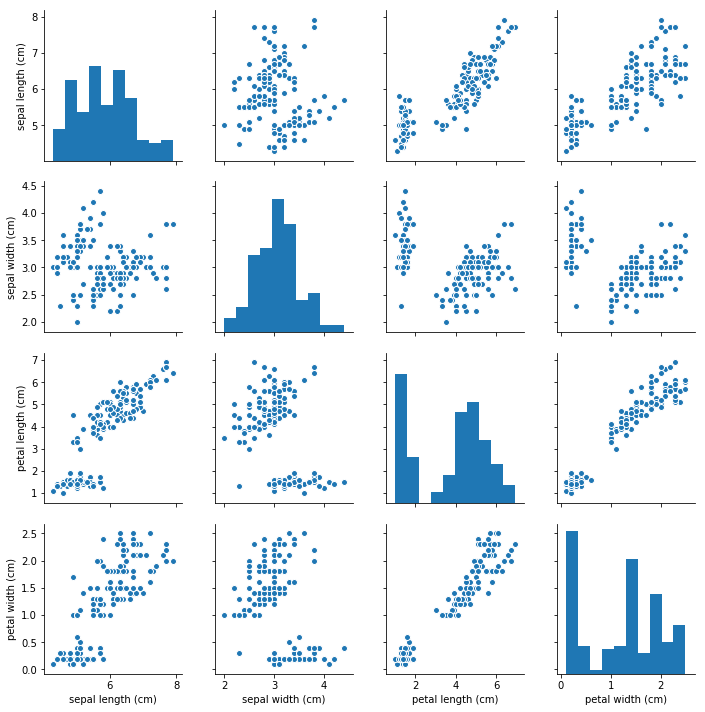

In [20]:
import seaborn as sns

sns.pairplot(iris_df.loc[:,iris_df.dtypes == 'float64'])

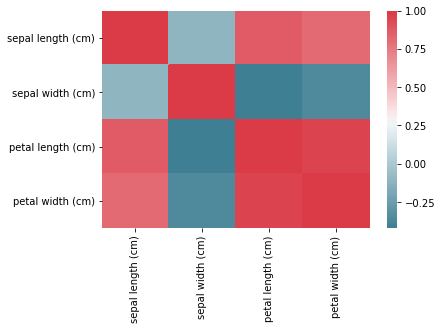

In [21]:
corr = iris_df.loc[:,iris_df.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

### Boxplot

**plotly does not support boxplot width proportional to variable or sample size**

In [22]:
## offline plot
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( y=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

size of group setosa: 50
size of group versicolor: 50
size of group virginica: 50


In [23]:
data = []

for tn in iris_df.target_name.unique():
    
    df = iris_df[iris_df.target_name == tn]
    print('size of group {}: {}'.format(tn, df.shape[0]))
    
    data.append(  go.Box( x=df['sepal length (cm)'] , name=str(tn), showlegend=False ) )

plotly.offline.iplot(data)

size of group setosa: 50
size of group versicolor: 50
size of group virginica: 50


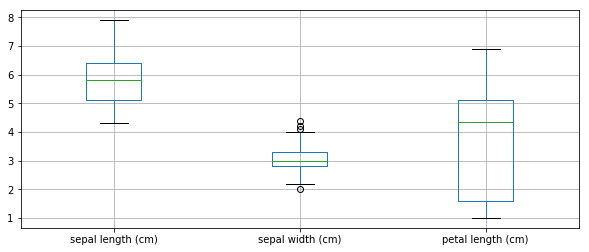

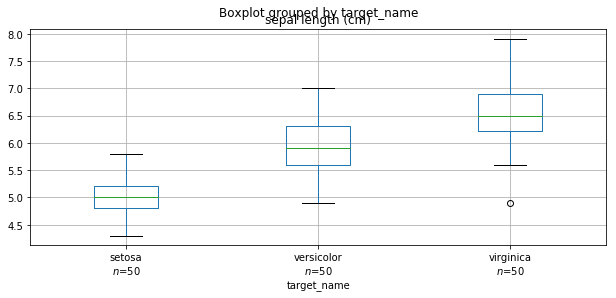

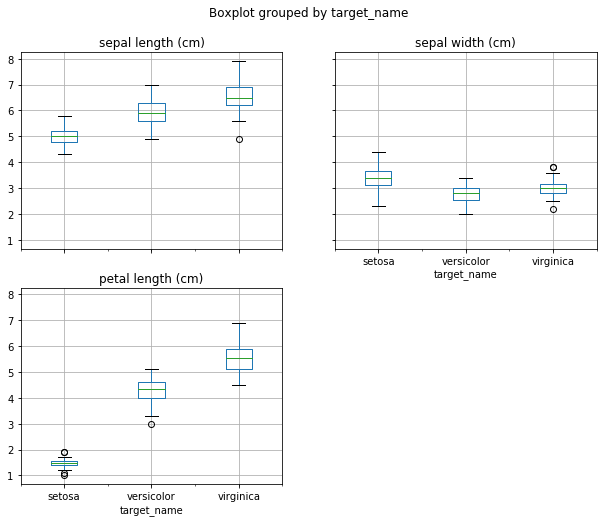

In [24]:
iris_df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,4));

print()
# The iris is not a good example for this visualization because the classes are balanced
# This is better in ggplot n R
dfg = iris_df.groupby('target_name')

counts = [len(v) for k, v in dfg]
total = float(sum(counts))
cases = len(counts)

widths = [c/total for c in counts] 

ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)'],
                widths=widths,
                   figsize=(10,4));

ax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k, v in dfg])

print()
ax = iris_df.boxplot(by='target_name', 
                column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
               figsize=(10,8));

### Histograms

In [25]:
x = iris_df['sepal length (cm)']
data = [ go.Histogram(x=x, nbinsx=8) ]

# trace3 = go.Histogram(
#     x=x,
#     xbins=dict(
#         start='1969-11-15',
#         end='1972-03-31',
#         size= 'M18'),
#     autobinx = False
# )

plotly.offline.iplot(data)

In [26]:
# Get the hist n bind edges
hist, bin_edges = np.histogram(iris_df['sepal length (cm)'], density=True)

hist
bin_edges


array([0.16666667, 0.42592593, 0.25925926, 0.5       , 0.2962963 ,
       0.48148148, 0.33333333, 0.11111111, 0.09259259, 0.11111111])

array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ])

(array([11., 34., 28., 26., 31., 12.,  7.,  1.]),
 array([4.3, 4.8, 5.3, 5.8, 6.3, 6.8, 7.3, 7.8, 8.3]),
 <a list of 8 Patch objects>)

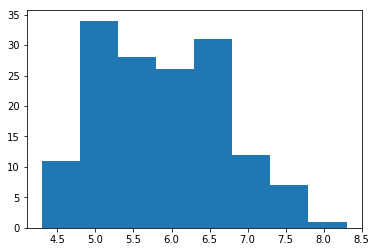

In [27]:
binwidth = 0.5

data = iris_df['sepal length (cm)'].tolist()

plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))

In [28]:
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1.5

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)

trace2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [ trace1, trace2 ]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(data)

### Subplot

In [ ]:
import cufflinks as cf

### Scatter plot

* text
* vline n hline
* legends
* xlabel n ylabel
* title


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

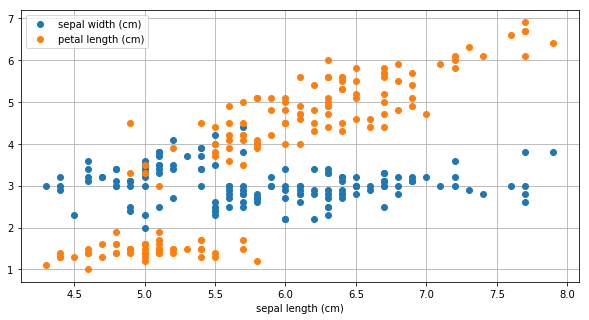

In [30]:
iris_df.columns
iris_df.plot(x='sepal length (cm)', y=['sepal width (cm)', 'petal length (cm)'], 
             style='o',
             figsize=(10,5), 
             grid=True)

In [31]:

x=[0, 1, 2, 3, 4, 5, 6, 7, 8]
y=[0, 1, 2, 3, 4, 5, 6, 7, 8]

df = pd.DataFrame({'x': x, 'y': y})
df.head()


trace1 =     go.Scatter(
        x=df['x'], # assign x as the dataframe column 'x'
        y=df['y'],
        name='Name of Trace 1: Using pandas'
    )

trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[1, 0, 3, 2, 5, 4, 7, 6, 8],
    name='Name of Trace 2. Not using pandas'
)

layout = go.Layout(
    title='Ex: Line Plot with Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [ trace1, trace2]

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)


,x,y
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


### Interactive plot wioth widgets

**It is like shinny. BUt looks like simple**

* Example with slider change the slop n cnstant of linwe equation


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
import ipywidgets as widgets

In [5]:
def f(m, b):
    
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))

output = interactive_plot.children[-1] # What is this?
output.layout.height = '350px'

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…